# Assignment

In this assignment, we look at some examples of third-party packages for EDA and visualizaiton. The data that we use is time series data. Time series data is very common and dealing with time series data sometimes requires that we take special care. The time series we use in this assignment has the monthly number of subspots between 1749 and 2013. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize': (8, 8)})
sunspots = pd.read_csv('../../data/sunspots.csv')
sunspots

,date,spots
0,Jan 1749,58.0
1,Feb 1749,62.6
2,Mar 1749,70.0
3,Apr 1749,55.7
4,May 1749,85.0
...,...,...
3172,May 2013,78.7
3173,Jun 2013,52.5
3174,Jul 2013,57.0
3175,Aug 2013,66.0


- Convert the timestamp column into `datetime` and then set it as the index of the data. This is how we can let pandas know that we have a time series data. <span style="color:red" float:right>[2 point]</span>

In [3]:
sunspots['date'] = pd.to_datetime(sunspots['date'],format="%b %Y")
sunspots.set_index('date', inplace=True)
sunspots

,spots
date,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
2013-05-01,78.7
2013-06-01,52.5
2013-07-01,57.0


- Create a line plot of this time series, using the index in the x-axis. <span style="color:red" float:right>[1 point]</span>

<Axes: xlabel='date'>

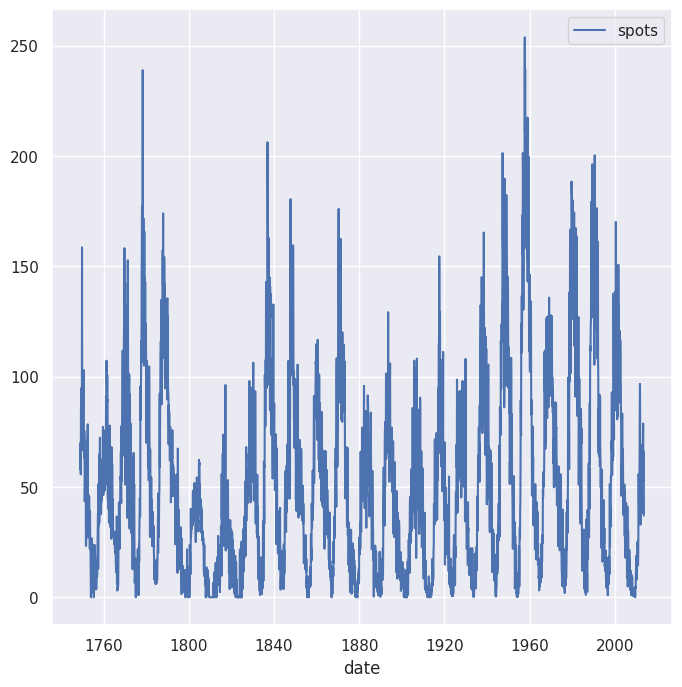

In [4]:
sns.lineplot(sunspots)

- The code at the beginning of the assignment set the figure size to a square aspect ratio of 8 by 8. Modify that code so the plot has a more pleasing wide aspect ratio. <span style="color:red" float:right>[1 point]</span>

<Axes: xlabel='date'>

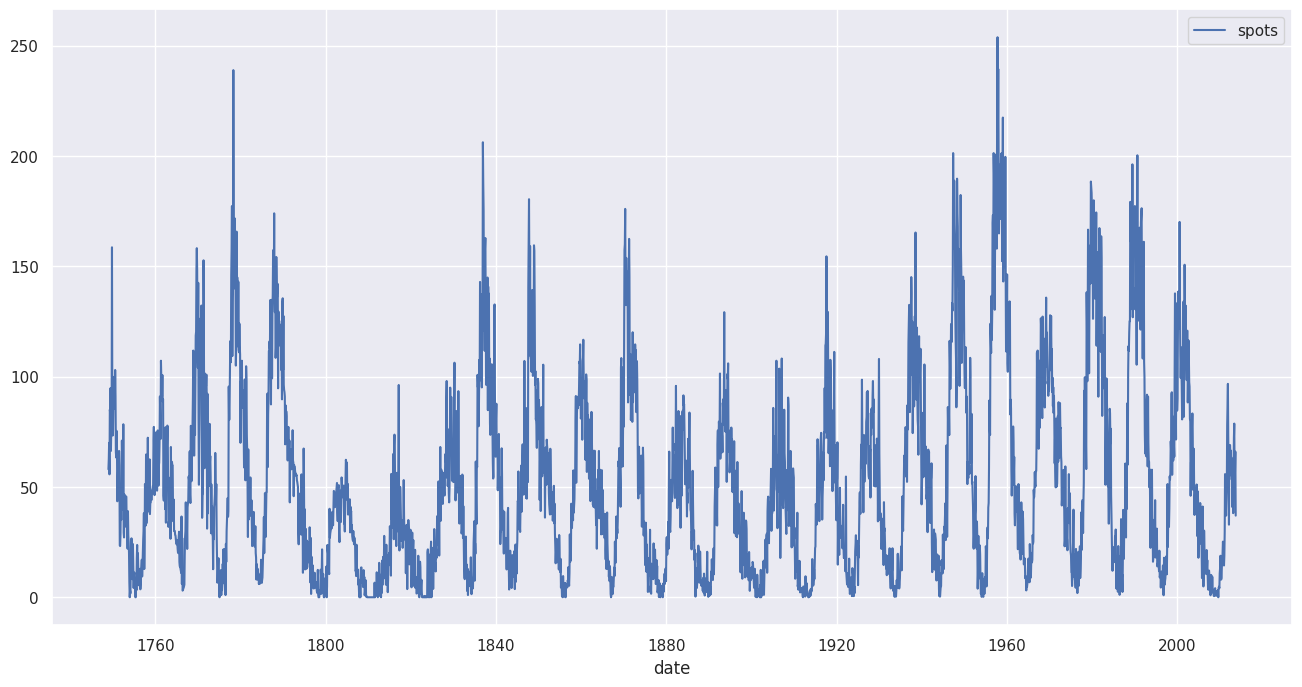

In [5]:
sns.set(rc={'figure.figsize': (16,8)})
sns.lineplot(sunspots)

It is often helpful to smooth out a time series plot using a moving average. In `pandas`, we can easily calculate moving averages (or other statistic) using the `rolling` method. An example is shown below.

In [6]:
x = pd.Series([5, 9, 10, 4, 8])
x.rolling(3).mean()

0         NaN
1         NaN
2    8.000000
3    7.666667
4    7.333333
dtype: float64

- State why the first two values of series above are `NaN`. <span style="color:red" float:right>[2 point]</span>

> Because the `rolling` method requires an argument that denotes the number of points to calculate the average of. Since this was defined as `3` the first two data points are `NaN` because there is not enough data to calculate the mean

- Create a new plot that shows both the original time series and the smoothed out time series using a rolling average with the window size set to 24. Your plot should include labels to indicate which line plot is which, such as 'original' and 'rolling average'. <span style="color:red" float:right>[5 point]</span>

<Axes: xlabel='date'>

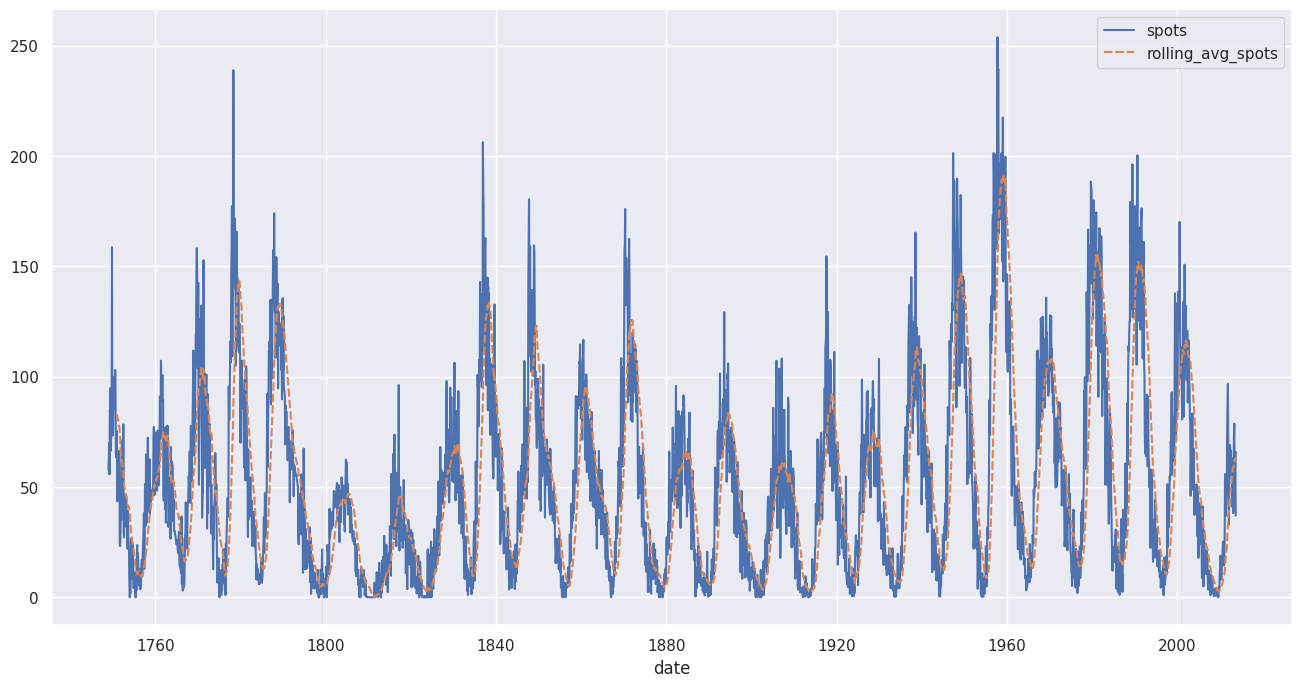

In [7]:
sunspots['rolling_avg_spots'] = sunspots['spots'].rolling(24).mean()
sns.lineplot(sunspots)

Another way to smooth out the data is to aggregate the data from monthly to yearly. There are different ways of doing that, but the easiest way is by using the `resample` method, as shown [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). Since we are going from monthly data to yearly, we call this **downsampling**. We can also use `resample` to **upsample** the data.

- Use resample to aggregate the data to yearly totals, then plot a line plot of the data. <span style="color:red" float:right>[5 point]</span>

<Axes: xlabel='date'>

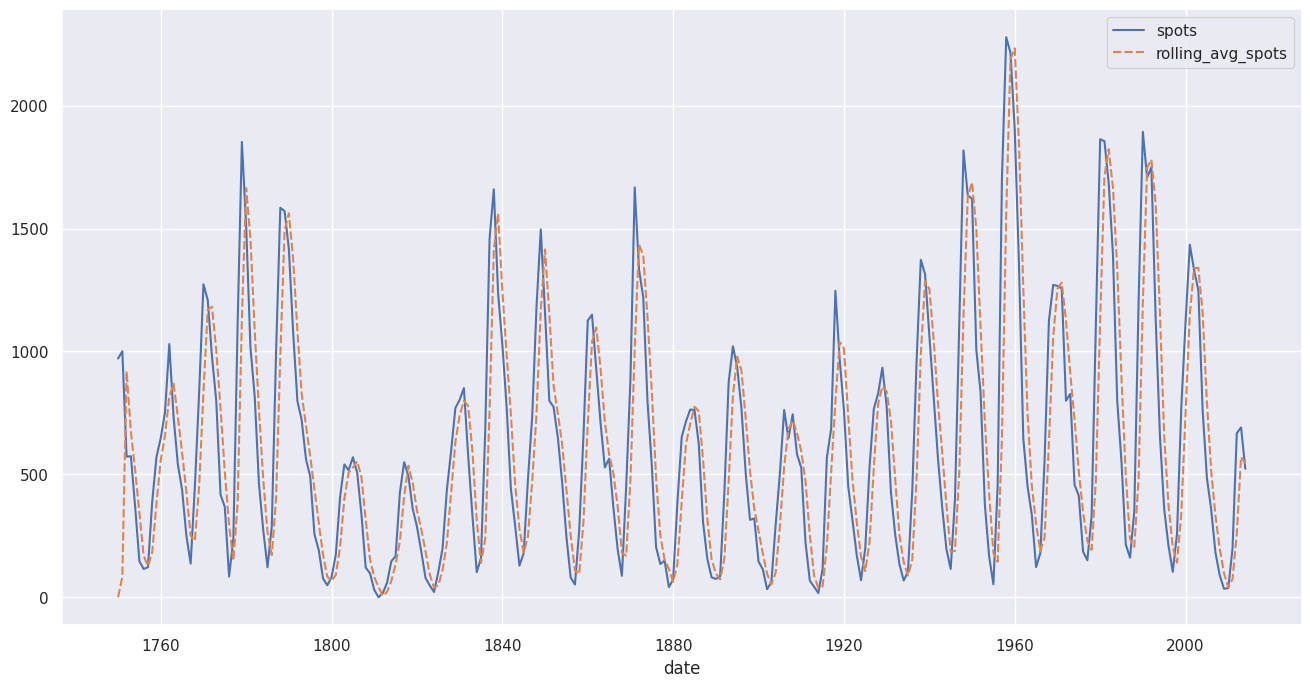

In [8]:
sns.lineplot(sunspots.resample('YE').sum())

The plot should show the number of sunspots on the vertical axis and the datetime on the horizontal axis. 

# End of assignment